<a href="https://colab.research.google.com/github/MOHD-TAUFIQUE/Classification-Project/blob/main/Copy_of_Copy_of_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [3]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [4]:
## Download stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
corona_tweet_df=pd.read_csv('https://raw.githubusercontent.com/MOHD-TAUFIQUE/Classification-Project/main/Coronavirus%20Tweets.csv',encoding="ISO-8859-1")

In [7]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
corona_tweet_df.shape

(41157, 6)

In [9]:
corona_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [10]:
corona_tweet_df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [11]:
# Names Of columns in our dataset
corona_tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# All tweets came only from March and April month of 2020.
corona_tweet_df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [13]:
# There are 12220 unique locations from where the tweets came.
corona_tweet_df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [14]:
# There are 5 unique sentiment types in our dataset
corona_tweet_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [15]:
# Checking the % of Null values and duplicate values if any
print(corona_tweet_df.isnull().sum()/len(corona_tweet_df)*100)

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64


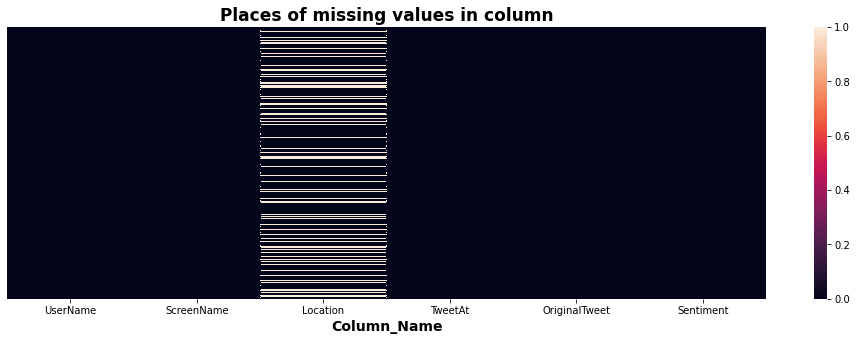

In [16]:
plt.figure(figsize=(17, 5))
sns.heatmap(corona_tweet_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

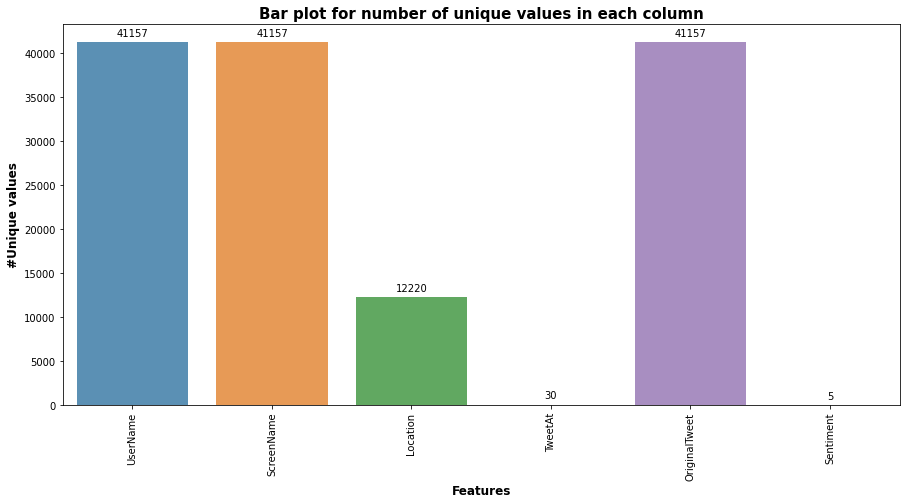

In [17]:
unique_df = pd.DataFrame()
unique_df['Features'] = corona_tweet_df.columns
unique=[]
for i in corona_tweet_df.columns:
    unique.append(corona_tweet_df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [18]:
corona_tweet_df.TweetAt.value_counts()


20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

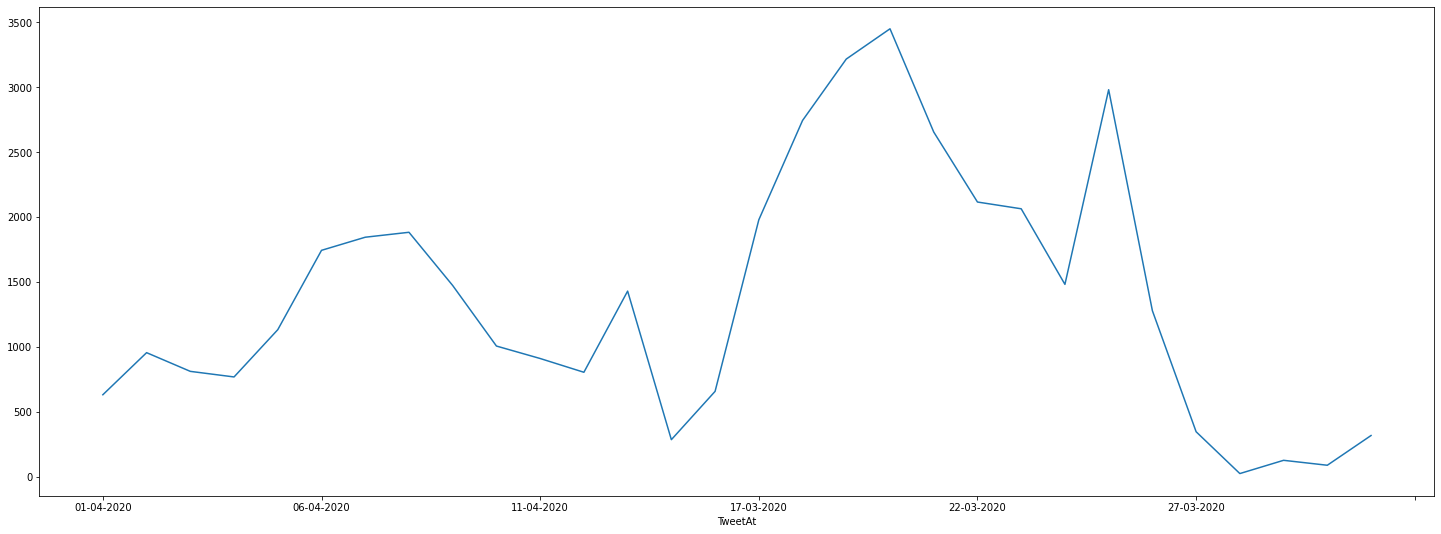

In [19]:
plt.figure(figsize=(25,9))
grp_tweetAt=corona_tweet_df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


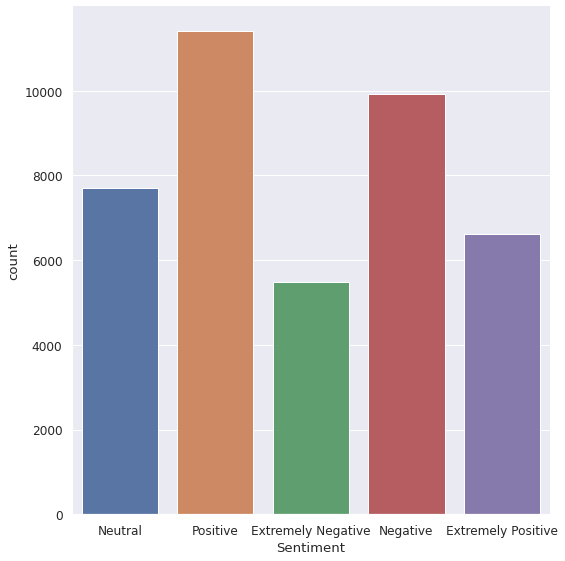

In [20]:
sns.set(font_scale=1.1)
sns.catplot("Sentiment", data=corona_tweet_df, kind="count", height=8)

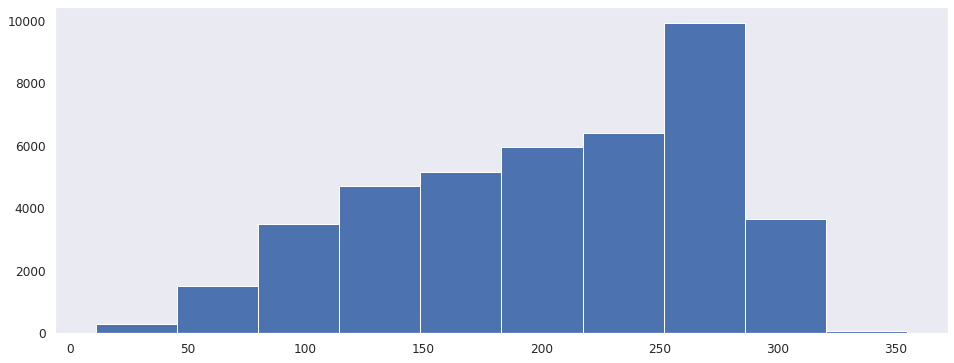

In [21]:
plt.figure(figsize=(16,6))
plt.grid()

plt.hist(corona_tweet_df['OriginalTweet'].str.len())
plt.show()

In [22]:
location_top10 = corona_tweet_df['Location'].value_counts().sort_values(ascending=False)[:10]
location_top10

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

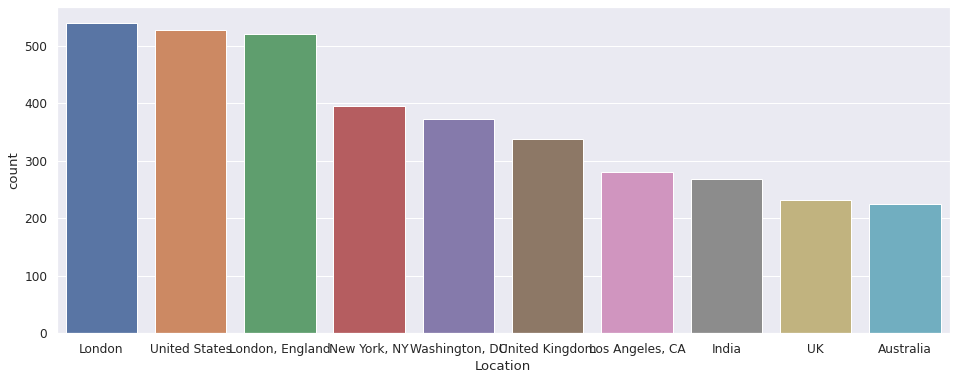

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(data=corona_tweet_df[corona_tweet_df['Location'].isin(location_top10.index)], x='Location',order=location_top10.index)

In [24]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Extremely Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative
...,...,...,...,...,...,...
41115,44914,89866,NaN,14-04-2020,Food Banks are not equipped for a 30% unemploy...,Extremely Negative
41128,44927,89879,"Melbourne, Australia",14-04-2020,The COVID-19 pandemic and global oil price war...,Extremely Negative
41130,44929,89881,NaN,14-04-2020,Squeo works in the meat department of a Kroger...,Extremely Negative
41133,44932,89884,Austria,14-04-2020,A Singaporean politician who slammed a woman s...,Extremely Negative


In [25]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Extremely Negative'].loc[27,'OriginalTweet']


'This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂ\x92m doing ???? No panic. https://t.co/Lg7HVMZglZ'

In [26]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative
...,...,...,...,...,...,...
41127,44926,89878,NaN,14-04-2020,Today at the grocery store I saw someone getti...,Negative
41131,44930,89882,"Accra, Ghana",14-04-2020,In every human affliction there are gainers a...,Negative
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative


In [27]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Negative'].loc[30,'OriginalTweet']


'There Is of in the Country  The more empty shelves people see the more buying ensues the more food is out of stock'

In [28]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,3816,48768,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...
41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral
41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral
41144,44943,89895,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having...,Neutral
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [29]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Neutral'].loc[10,'OriginalTweet']


"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [30]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41140,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive
41145,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York C...,Positive
41146,44945,89897,"Gurgaon, India",14-04-2020,#Gold prices rose to a more than 7-year high t...,Positive
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive


In [31]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Positive'].loc[41145,'OriginalTweet']


"How exactly are we going to re-open New York City if we still can't buy any hand sanitizer?  #coronavirus"

In [32]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41137,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their p...,Extremely Positive
41138,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive
41142,44941,89893,Juba south sudan,14-04-2020,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive


In [33]:
corona_tweet_df[corona_tweet_df['Sentiment']=='Extremely Positive'].loc[11,'OriginalTweet']


'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [34]:
import re

In [35]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [36]:
# create new column with removed @user
corona_tweet_df['Tweet'] = np.vectorize(remove_pattern)(corona_tweet_df['OriginalTweet'], '@[\w]*')

In [37]:
corona_tweet_df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...


In [38]:
corona_tweet_df['Tweet'] = corona_tweet_df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [39]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [40]:
# remove special characters, numbers, punctuations
corona_tweet_df['Tweet'] = corona_tweet_df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [41]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...


In [42]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in stopwords.words('english')]

  # joining the list of words with space separator 
  return " ".join(text)

In [43]:
corona_tweet_df['Tweet'] = corona_tweet_df['Tweet'].apply(remove_stopwords)

In [44]:
corona_tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreak paranoid ...


In [45]:
# create new variable tokenized tweet 
tokenized_tweet = corona_tweet_df['Tweet'].apply(lambda x: x.split())

In [46]:
#import nltk
#nltk.download('wordnet')

In [47]:
#from nltk.stem import WordNetLemmatizer

In [48]:
#Lemmatizer=WordNetLemmatizer()

In [49]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [50]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [51]:
corona_tweet_df['Tweet']  = tokenized_tweet
corona_tweet_df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas panic enough food e...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi go supermarket #covid outbreak paranoid ...


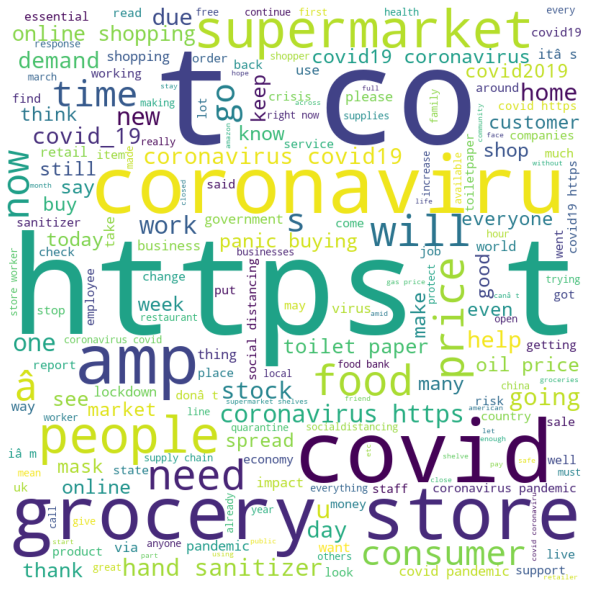

In [52]:
# Python program to generate WordCloud
  ## Based on https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in corona_tweet_df.OriginalTweet:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [53]:
Final_df = corona_tweet_df[['Tweet','Sentiment']]


In [54]:
Final_df.head()



,Tweet,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock one empti pleas panic enough food e...,Positive
4,readi go supermarket #covid outbreak paranoid ...,Extremely Negative


In [55]:
Final_df.shape


(41157, 2)

In [56]:
Final_df.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

In [57]:
Final_df["Sentiment"]= Final_df["Sentiment"].replace('Positive',1) 
Final_df["Sentiment"]= Final_df["Sentiment"].replace('Extremely Positive',1) 
Final_df["Sentiment"]= Final_df["Sentiment"].replace('Neutral',1) 
Final_df["Sentiment"]= Final_df["Sentiment"].replace('Negative',0) 
Final_df["Sentiment"]= Final_df["Sentiment"].replace('Extremely Negative',0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [58]:
Final_df['Sentiment'].value_counts()


1    25759
0    15398
Name: Sentiment, dtype: int64

In [68]:
# from tkinter.constants import TRUE
# X = Final_df.drop('Sentiment', axis=1,inplace=TRUE)
# Y = Final_df.Sentiment

In [72]:
## defining Independent variable
X = Final_df.Tweet

## defining dependent variable
Y = Final_df.Sentiment

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

train,test = train_test_split(Final_df,test_size = 0.2,random_state=0,stratify = Final_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 2)
test shape :  (8232, 2)


In [96]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_test = vectorizer.transform(test.Tweet.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 27409)
X_test.shape :  (8232, 27409)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


In [73]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=50)

In [74]:
#X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((32925,), (32925,), (8232,), (8232,))

In [75]:
# tvec = TfidfVectorizer()
# LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [76]:
# from sklearn.pipeline import Pipeline

# model = Pipeline([('vectorizer',tvec),('classifier',LR)])
# model.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [77]:
## model prediction
#Y_pred = model.predict(X_test)

In [79]:
# print('Accuracy :' ,accuracy_score(Y_pred,Y_test))
# print('Precision :', precision_score(Y_pred,Y_test, average='weighted'))
# print('Recall :', recall_score(Y_pred,Y_test, average='weighted'))

Accuracy : 0.8330903790087464
Precision : 0.8522656931694947
Recall : 0.8330903790087464


In [82]:
# from sklearn.linear_model import SGDClassifier

# sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

# model3 = Pipeline([('vectorizer',tvec),('classifier',sgd_clf)])
# model3.fit(X_train,Y_train)
# Y_pred_sgd = model3.predict(X_test)

In [83]:
# print('Accuracy :' ,accuracy_score(Y_pred_sgd,Y_test))
# print('Precision :', precision_score(Y_pred_sgd,Y_test, average='weighted'))
# print('Recall :', recall_score(Y_pred_sgd,Y_test, average='weighted'))

Accuracy : 0.827259475218659
Precision : 0.8529208937977744
Recall : 0.827259475218659


In [84]:
# from sklearn.svm import SVC

# svc = SVC()

# model4 = Pipeline([('vectorizer',tvec),('classifier',svc)])
# model4.fit(X_train,Y_train)
# Y_pred_svc = model3.predict(X_test)

In [85]:
# print('Accuracy :' ,accuracy_score(Y_pred_svc,Y_test))
# print('Precision :', precision_score(Y_pred_svc,Y_test, average='weighted'))
# print('Recall :', recall_score(Y_pred_svc,Y_test, average='weighted'))

Accuracy : 0.827259475218659
Precision : 0.8529208937977744
Recall : 0.827259475218659


In [86]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()

In [87]:
#model5 = Pipeline([('vectorizer',tvec),('classifier',rf)])

In [88]:
#model5.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [89]:
#Y_pred_rf = model5.predict(X_test)

In [90]:
# print('Accuracy :' ,accuracy_score(Y_pred_rf,Y_test))
# print('Precision :', precision_score(Y_pred_rf,Y_test, average='weighted'))
# print('Recall :', recall_score(Y_pred_rf,Y_test, average='weighted'))

Accuracy : 0.8115889212827988
Precision : 0.8303329956459669
Recall : 0.8115889212827988


In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve


In [99]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8594077448747153
Validation accuracy Score :  0.7906948493683188
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      2925
           1       0.85      0.82      0.84      5307

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.77      8232
weighted avg       0.79      0.79      0.79      8232



In [100]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9985725132877753
Validation accuracy Score :  0.8288386783284742
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      2693
           1       0.90      0.84      0.87      5539

    accuracy                           0.83      8232
   macro avg       0.80      0.82      0.81      8232
weighted avg       0.84      0.83      0.83      8232



In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9391040242976462
Validation accuracy Score :  0.8599368318756074
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      2775
           1       0.92      0.87      0.89      5457

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [102]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.7459377372817009
Validation accuracy Score :  0.7414965986394558
              precision    recall  f1-score   support

           0       0.38      0.84      0.53      1404
           1       0.96      0.72      0.82      6828

    accuracy                           0.74      8232
   macro avg       0.67      0.78      0.67      8232
weighted avg       0.86      0.74      0.77      8232



In [103]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9574183750949127
Validation accuracy Score :  0.847181729834791
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      2450
           1       0.94      0.84      0.88      5782

    accuracy                           0.85      8232
   macro avg       0.82      0.85      0.83      8232
weighted avg       0.87      0.85      0.85      8232



In [104]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9364009111617312
Validation accuracy Score :  0.8623663751214772
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2889
           1       0.91      0.88      0.89      5343

    accuracy                           0.86      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



In [109]:
models = pd.DataFrame({
    'Model': ['Stochastic Gradient Decent','Logistic Regression','Support Vector Machines',
              'Random Forest', 'Naive Bayes','XGBoost'],
    'Test accuracy': [sgd_accuracy, logreg_accuracy,svc_accuracy,
              rf_accuracy, NB_accuracy,xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
0,Stochastic Gradient Decent,0.862366
1,Logistic Regression,0.859937
2,Support Vector Machines,0.847182
3,Random Forest,0.828839
4,Naive Bayes,0.790695
5,XGBoost,0.741497
